In [66]:
import pandas as pd

df = pd.read_json("results/benchmark_results_8_cores.json")

print(df.head())

   mutation_rate  tournament_size  max_generations    mpi_strategy  \
0           0.05                5               40  MPINoMigration   
1           0.05                5               40  MPINoMigration   
2           0.05                5               40  MPINoMigration   
3           0.05                5               40  MPINoMigration   
4           0.05                5               40  MPINoMigration   

   population_size  num_cities  migration_size  migrations_count  \
0               30          50               5                 2   
1               30          50               5                 2   
2               30          50               5                 2   
3               30          50               5                 8   
4               30          50               5                 8   

      optimization_strategy  avg_time  avg_route_length  
0            NoOptimization  0.823436          8.621975  
1  ChristofidesOptimization  0.864046          8.06443

In [67]:
grouped_df = (
    df.groupby(
        [
            "mpi_strategy",
            "optimization_strategy",
            "mutation_rate",
            "tournament_size",
            "max_generations",
        ]
    )
    .agg({"avg_time": "mean", "avg_route_length": "mean"})
    .reset_index()
)

print(grouped_df)

best_result = grouped_df.loc[grouped_df["avg_route_length"].idxmin()]
print("Best Result:")
print(best_result)

fastest_result = grouped_df.loc[grouped_df["avg_time"].idxmin()]
print("Fastest Result:")
print(fastest_result)

grouped_df["performance_metric"] = (
    grouped_df["avg_route_length"] * grouped_df["avg_time"]
)
best_tradeoff = grouped_df.loc[grouped_df["performance_metric"].idxmin()]
print("Best Trade-Off Result:")
print(best_tradeoff)

            mpi_strategy     optimization_strategy  mutation_rate  \
0   MPIAllToAllMigration  ChristofidesOptimization           0.05   
1   MPIAllToAllMigration  ChristofidesOptimization           0.05   
2   MPIAllToAllMigration  ChristofidesOptimization           0.05   
3   MPIAllToAllMigration  ChristofidesOptimization           0.10   
4   MPIAllToAllMigration  ChristofidesOptimization           0.10   
..                   ...                       ...            ...   
76      MPIRingMigration            NoOptimization           0.10   
77      MPIRingMigration            NoOptimization           0.10   
78      MPIRingMigration            NoOptimization           0.20   
79      MPIRingMigration            NoOptimization           0.20   
80      MPIRingMigration            NoOptimization           0.20   

    tournament_size  max_generations  avg_time  avg_route_length  
0                 5               40  0.994390          8.429702  
1                10               40 

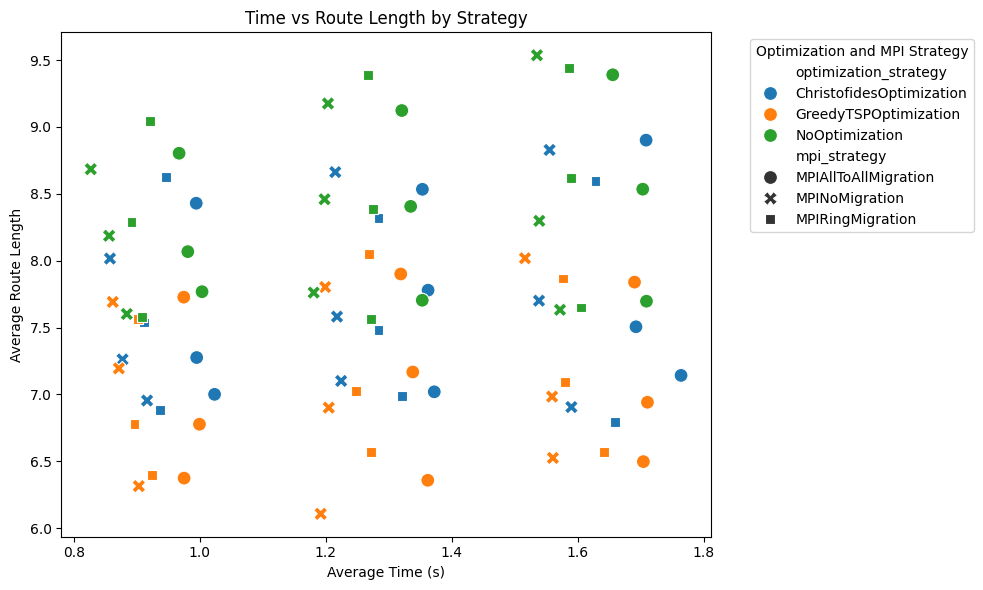

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped_df,
    x="avg_time",
    y="avg_route_length",
    hue="optimization_strategy",
    style="mpi_strategy",
    s=100,
)

plt.title("Time vs Route Length by Strategy")
plt.xlabel("Average Time (s)")
plt.ylabel("Average Route Length")
plt.legend(
    title="Optimization and MPI Strategy", bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.tight_layout()
plt.show()

Columns in DataFrame: Index(['mutation_rate', 'tournament_size', 'max_generations', 'mpi_strategy',
       'population_size', 'num_cities', 'migration_size', 'migrations_count',
       'optimization_strategy', 'avg_time', 'avg_route_length', 'cores'],
      dtype='object')


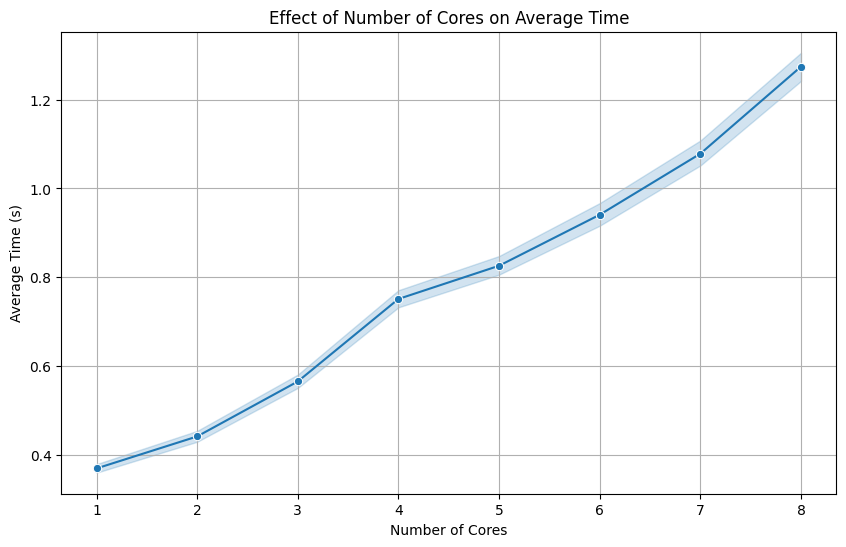

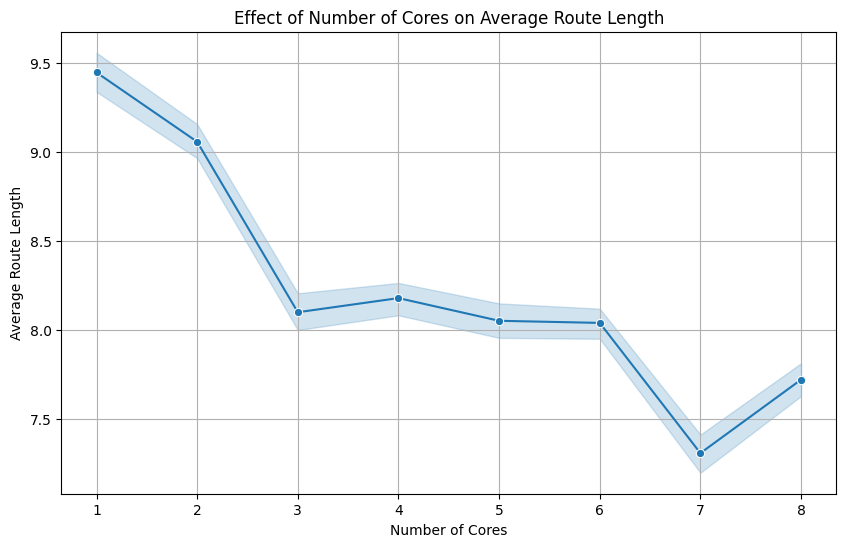

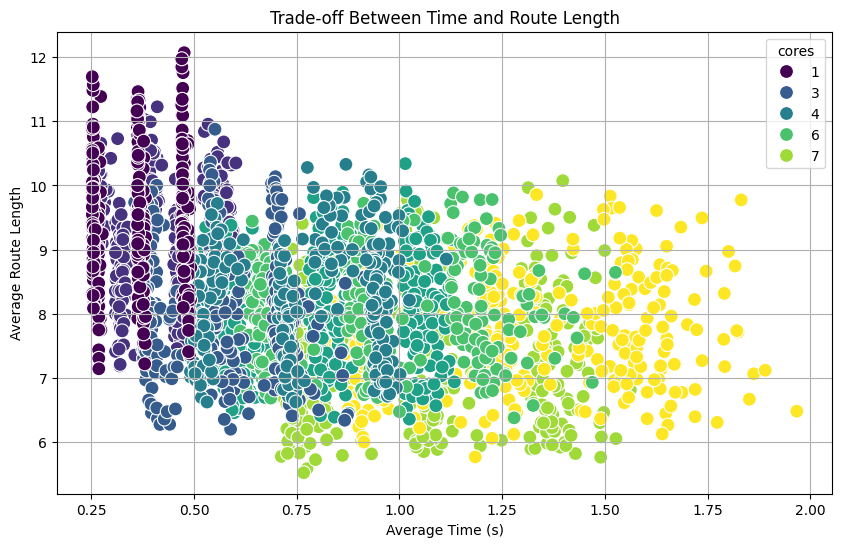

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import json


def load_benchmark_data(file_pattern: str) -> pd.DataFrame:
    """Load all JSON benchmark results into a single DataFrame."""
    files = glob.glob(file_pattern)
    all_data = []

    for file in files:
        with open(file, "r") as f:
            data = json.load(f)
            for result in data:
                # Add number of cores based on the filename
                cores = int(file.split("_")[-2])
                result["cores"] = cores
                all_data.append(result)

    return pd.DataFrame(all_data)


def process_and_visualize(df: pd.DataFrame):
    """Process the DataFrame and create visualizations."""
    # Print columns to verify their names
    print("Columns in DataFrame:", df.columns)

    # Convert relevant columns to numeric types
    df["avg_time"] = pd.to_numeric(df["avg_time"])
    df["avg_route_length"] = pd.to_numeric(df["avg_route_length"])
    df["cores"] = pd.to_numeric(df["cores"])

    # Plot the effect of cores on average time
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="cores", y="avg_time", marker="o")
    plt.title("Effect of Number of Cores on Average Time")
    plt.xlabel("Number of Cores")
    plt.ylabel("Average Time (s)")
    plt.grid(True)
    plt.show()

    # Plot the effect of cores on average route length
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="cores", y="avg_route_length", marker="o")
    plt.title("Effect of Number of Cores on Average Route Length")
    plt.xlabel("Number of Cores")
    plt.ylabel("Average Route Length")
    plt.grid(True)
    plt.show()

    # If you want to see the trade-off between time and route length
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x="avg_time",
        y="avg_route_length",
        hue="cores",
        palette="viridis",
        s=100,
    )
    plt.title("Trade-off Between Time and Route Length")
    plt.xlabel("Average Time (s)")
    plt.ylabel("Average Route Length")
    plt.grid(True)
    plt.show()


file_pattern = "results/benchmark_results_*_cores.json"
df = load_benchmark_data(file_pattern)
process_and_visualize(df)

In [73]:
def process_data(df):
    # Convert relevant columns to numeric types
    df["avg_time"] = pd.to_numeric(df["avg_time"])
    df["avg_route_length"] = pd.to_numeric(df["avg_route_length"])
    df["cores"] = pd.to_numeric(df["cores"])

    return df


df = process_data(df)

In [74]:
# Group by different parameters and calculate mean metrics
grouped_by_mutation = df.groupby("mutation_rate")[
    ["avg_time", "avg_route_length"]
].mean()
grouped_by_tournament = df.groupby("tournament_size")[
    ["avg_time", "avg_route_length"]
].mean()
grouped_by_mpi = df.groupby("mpi_strategy")[["avg_time", "avg_route_length"]].mean()
grouped_by_opt = df.groupby("optimization_strategy")[
    ["avg_time", "avg_route_length"]
].mean()
grouped_by_migration = df.groupby(["migration_size", "migrations_count"])[
    ["avg_time", "avg_route_length"]
].mean()

# Display the results
print("Grouped by Mutation Rate:")
print(grouped_by_mutation)
print("\nGrouped by Tournament Size:")
print(grouped_by_tournament)
print("\nGrouped by MPI Strategy:")
print(grouped_by_mpi)
print("\nGrouped by Optimization Strategy:")
print(grouped_by_opt)
print("\nGrouped by Migration Parameters:")
print(grouped_by_migration)

Grouped by Mutation Rate:
               avg_time  avg_route_length
mutation_rate                            
0.05           0.773997          9.084095
0.10           0.777412          8.200390
0.20           0.790827          7.425236

Grouped by Tournament Size:
                 avg_time  avg_route_length
tournament_size                            
5                0.558733          8.117274
10               0.781843          8.300156
15               1.001660          8.292292

Grouped by MPI Strategy:
                      avg_time  avg_route_length
mpi_strategy                                    
MPIAllToAllMigration  0.804700          8.245744
MPINoMigration        0.761079          8.236611
MPIRingMigration      0.776456          8.227367

Grouped by Optimization Strategy:
                          avg_time  avg_route_length
optimization_strategy                               
ChristofidesOptimization  0.792610          7.960562
GreedyTSPOptimization     0.775815          7.9150

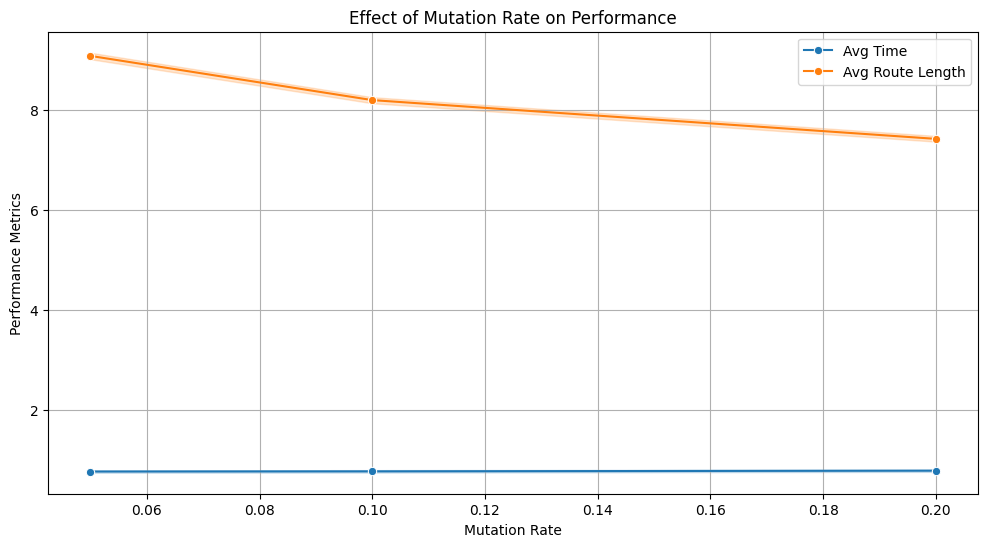

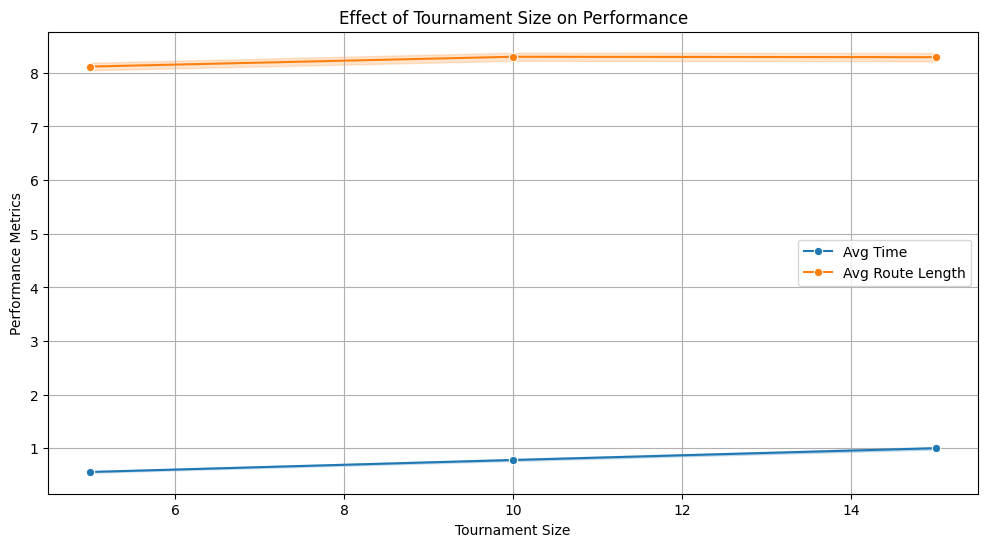

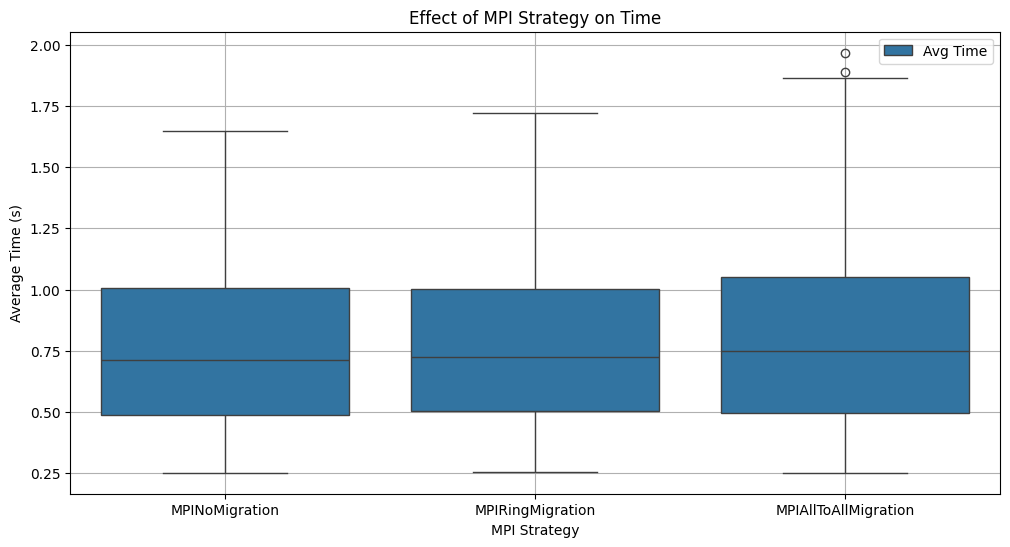

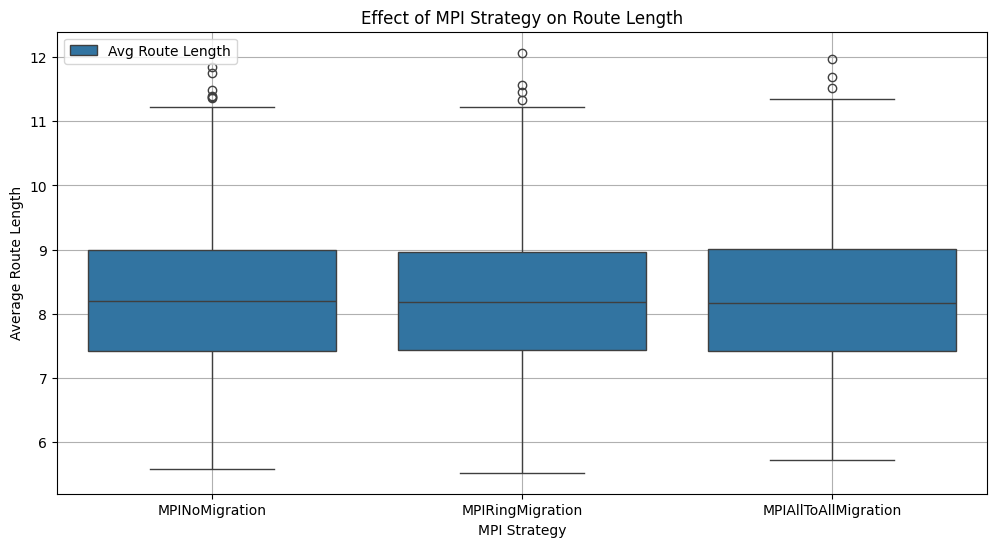

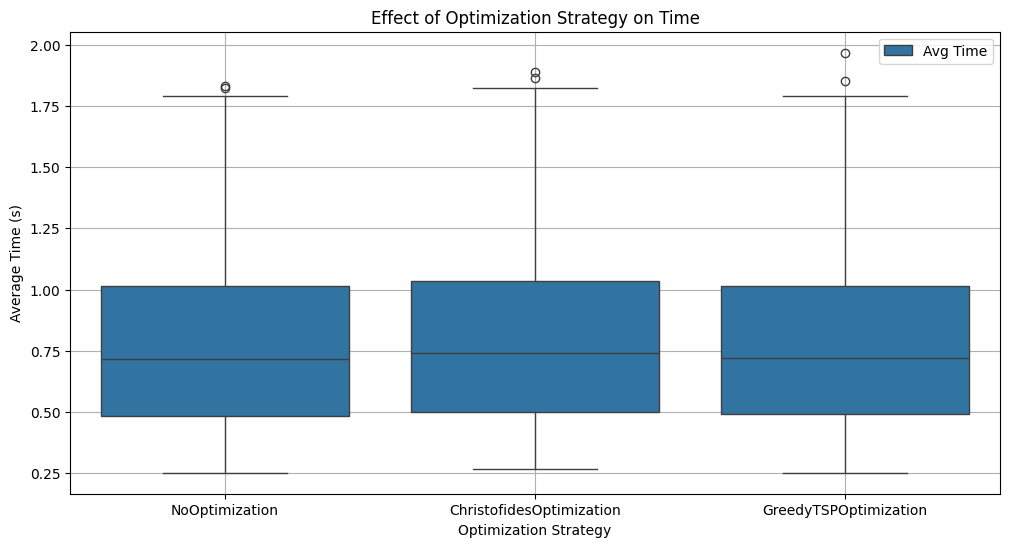

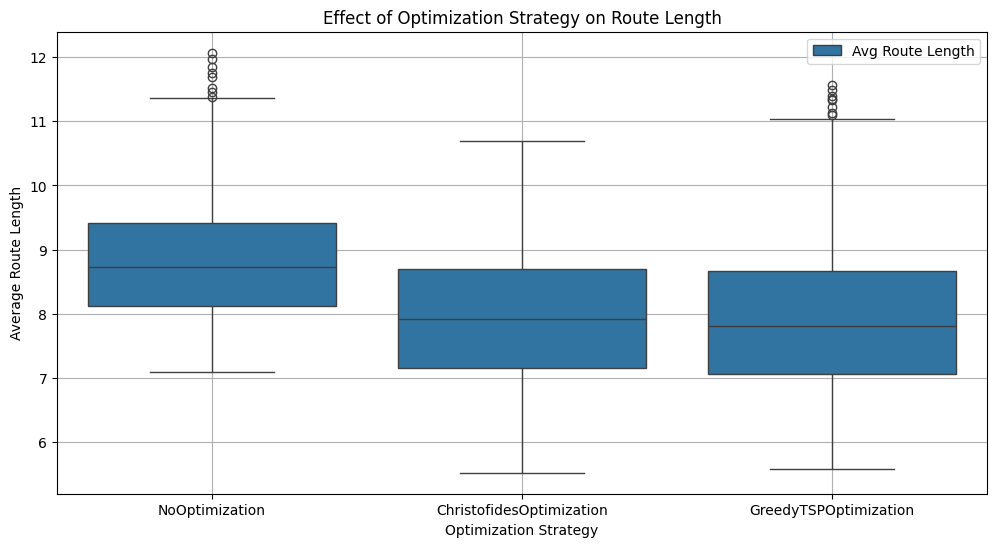

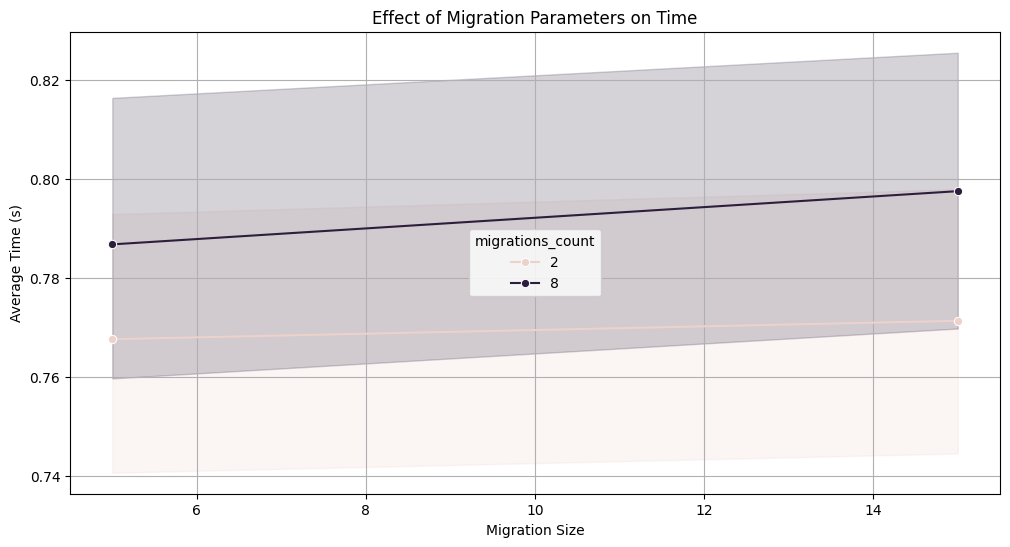

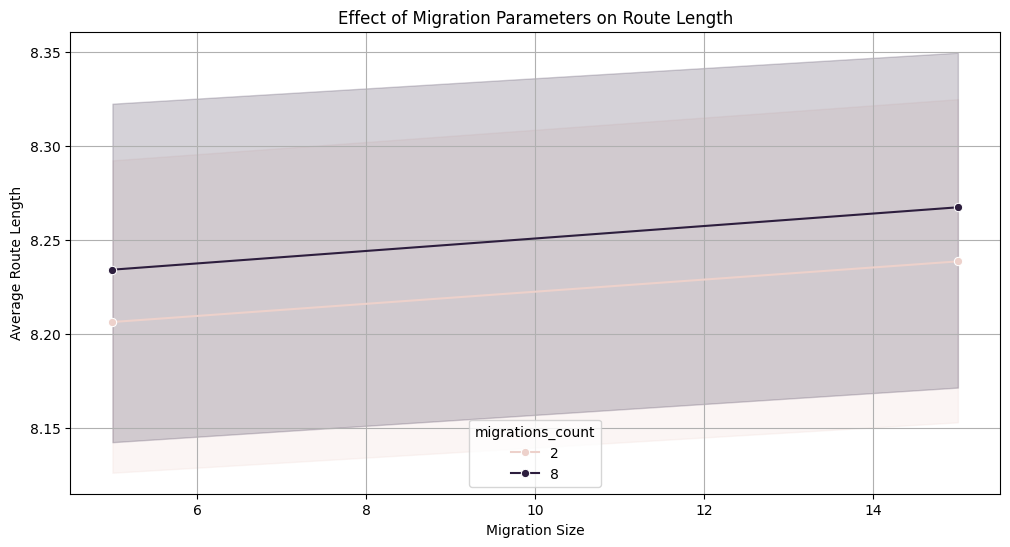

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Mutation Rate vs Performance
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="mutation_rate", y="avg_time", marker="o", label="Avg Time")
sns.lineplot(
    data=df,
    x="mutation_rate",
    y="avg_route_length",
    marker="o",
    label="Avg Route Length",
)
plt.title("Effect of Mutation Rate on Performance")
plt.xlabel("Mutation Rate")
plt.ylabel("Performance Metrics")
plt.legend()
plt.grid(True)
plt.show()

# Plot Tournament Size vs Performance
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="tournament_size", y="avg_time", marker="o", label="Avg Time")
sns.lineplot(
    data=df,
    x="tournament_size",
    y="avg_route_length",
    marker="o",
    label="Avg Route Length",
)
plt.title("Effect of Tournament Size on Performance")
plt.xlabel("Tournament Size")
plt.ylabel("Performance Metrics")
plt.legend()
plt.grid(True)
plt.show()

# Plot MPI Strategy vs Performance
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="mpi_strategy", y="avg_time", label="Avg Time")
plt.title("Effect of MPI Strategy on Time")
plt.xlabel("MPI Strategy")
plt.ylabel("Average Time (s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="mpi_strategy", y="avg_route_length", label="Avg Route Length")
plt.title("Effect of MPI Strategy on Route Length")
plt.xlabel("MPI Strategy")
plt.ylabel("Average Route Length")
plt.grid(True)
plt.show()

# Plot Optimization Strategy vs Performance
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="optimization_strategy", y="avg_time", label="Avg Time")
plt.title("Effect of Optimization Strategy on Time")
plt.xlabel("Optimization Strategy")
plt.ylabel("Average Time (s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, x="optimization_strategy", y="avg_route_length", label="Avg Route Length"
)
plt.title("Effect of Optimization Strategy on Route Length")
plt.xlabel("Optimization Strategy")
plt.ylabel("Average Route Length")
plt.grid(True)
plt.show()

# Plot Migration Parameters vs Performance
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df, x="migration_size", y="avg_time", hue="migrations_count", marker="o"
)
plt.title("Effect of Migration Parameters on Time")
plt.xlabel("Migration Size")
plt.ylabel("Average Time (s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="migration_size",
    y="avg_route_length",
    hue="migrations_count",
    marker="o",
)
plt.title("Effect of Migration Parameters on Route Length")
plt.xlabel("Migration Size")
plt.ylabel("Average Route Length")
plt.grid(True)
plt.show()

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_26726/856753690.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_df, x=parameter, y='avg_route_length', ci=None)


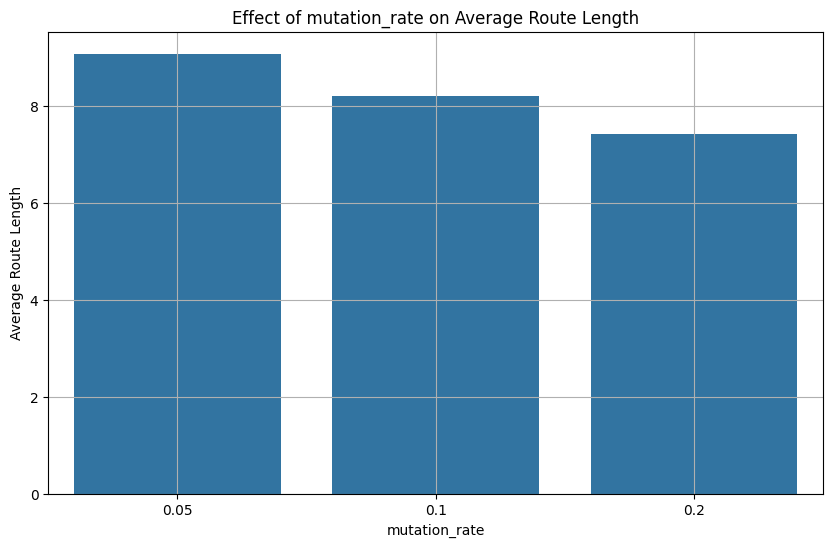

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_26726/856753690.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_df, x=parameter, y='avg_route_length', ci=None)


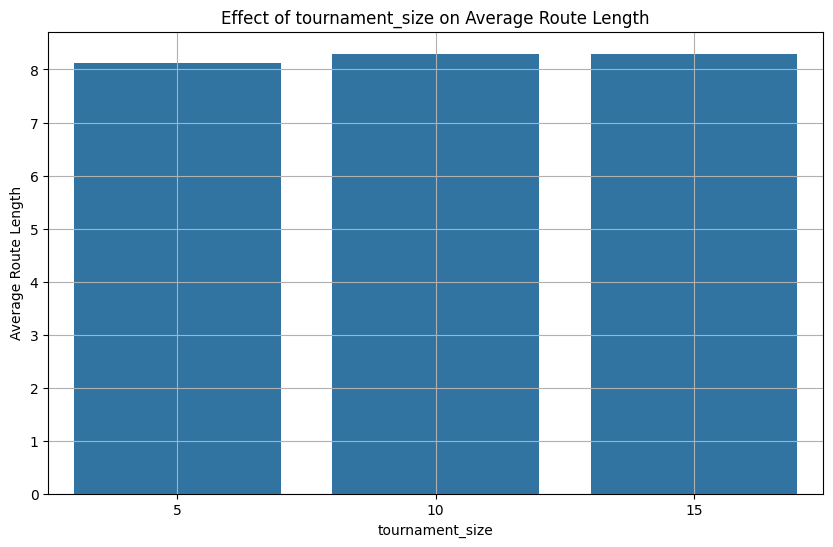

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_26726/856753690.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_df, x=parameter, y='avg_route_length', ci=None)


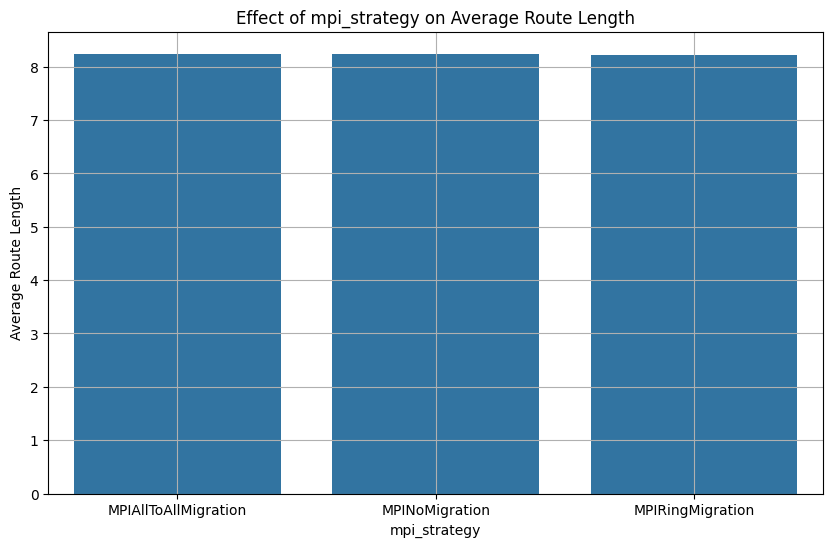

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_26726/856753690.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_df, x=parameter, y='avg_route_length', ci=None)


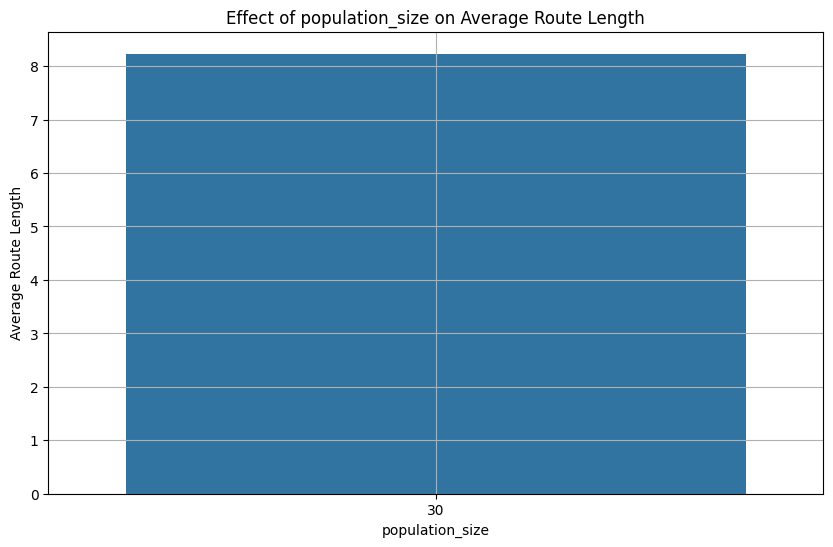

KeyError: 'strategy_params'

In [76]:
def analyze_parameter_effect(df: pd.DataFrame, parameter: str):
    """Analyze and visualize the effect of a given parameter on the avg_route_length."""
    grouped_df = df.groupby(parameter)["avg_route_length"].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_df, x=parameter, y="avg_route_length", ci=None)
    plt.title(f"Effect of {parameter} on Average Route Length")
    plt.xlabel(parameter)
    plt.ylabel("Average Route Length")
    plt.grid(True)
    plt.show()


# Analyze the effect of each parameter
parameters = [
    "mutation_rate",
    "tournament_size",
    "mpi_strategy",
    "population_size",
    "strategy_params",
    "optimization_strategy",
]
for param in parameters:
    analyze_parameter_effect(df, param)

/var/folders/41/jks7nyyn6433ckh2kqf00tjc0000gn/T/ipykernel_26726/4171010733.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


<Figure size 1200x800 with 0 Axes>

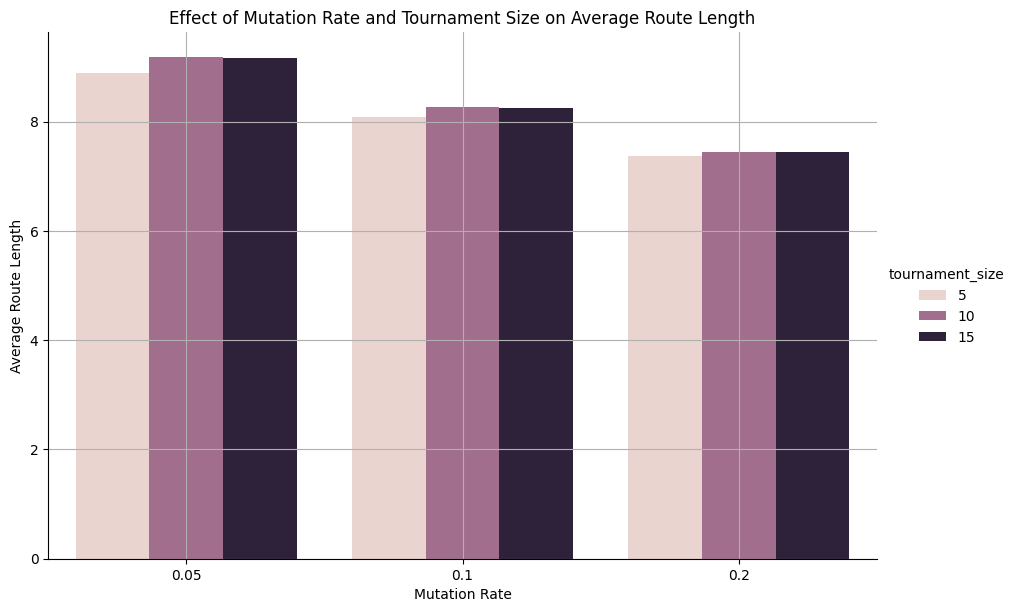

In [77]:
# Example: Pairwise interaction between mutation_rate and tournament_size
plt.figure(figsize=(12, 8))
sns.catplot(
    data=df,
    x="mutation_rate",
    y="avg_route_length",
    hue="tournament_size",
    kind="bar",
    ci=None,
    height=6,
    aspect=1.5,
)
plt.title("Effect of Mutation Rate and Tournament Size on Average Route Length")
plt.xlabel("Mutation Rate")
plt.ylabel("Average Route Length")
plt.grid(True)
plt.show()